# Salary Prediction using Linear Regression

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 

In [2]:
df = pd.read_csv("Salary Data.csv", sep=',')
df.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


# EDA -- >Exploratory Data Analysis 

In [3]:
#null value check
df.isnull().sum()

Experience Years    0
Salary              0
dtype: int64

Text(0.5, 1.0, 'Salary Increase')

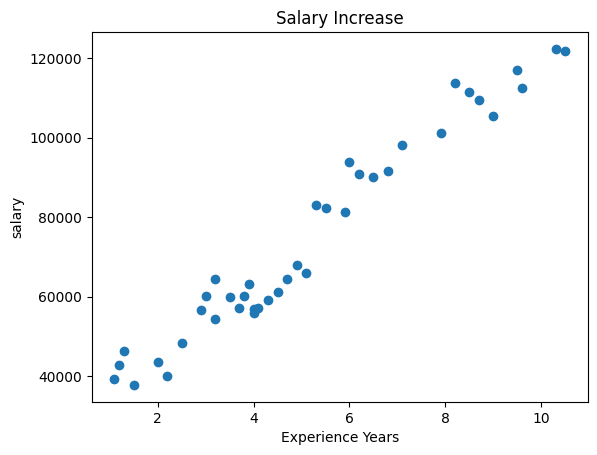

In [4]:
plt.scatter(df['Experience Years'],df['Salary'])
plt.xlabel('Experience Years')
plt.ylabel('salary')
plt.title('Salary Increase')

# Linear Regression

In [5]:
x=df[['Experience Years']]
x.head()

,Experience Years
0,1.1
1,1.2
2,1.3
3,1.5
4,2.0


In [6]:
y=df[['Salary']]
y.head()

,Salary
0,39343
1,42774
2,46205
3,37731
4,43525


In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
reg = LinearRegression()

Text(0.5, 1.0, 'Salary Increase')

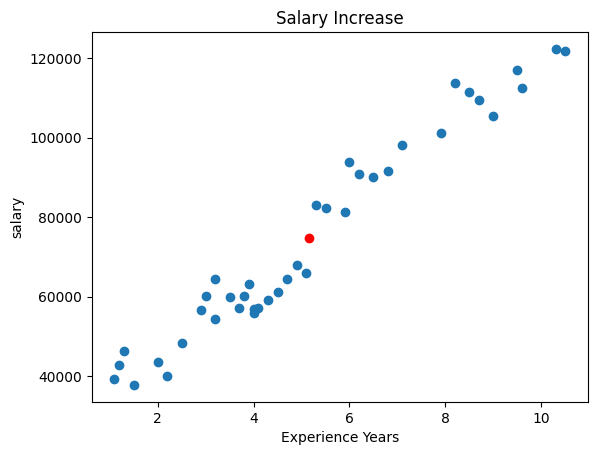

In [9]:

plt.scatter(x.mean(),y.mean(),color='red')
#matplotlib
plt.scatter(df['Experience Years'],df['Salary'])
plt.xlabel('Experience Years')
plt.ylabel('salary')
plt.title('Salary Increase')

In [10]:
reg.fit(x, y)  #train the model

LinearRegression()

In [11]:
#coef_ (Coefficient) – "Slope"
#It tells you how much the target (output) changes when you change the input (feature).
m=reg.coef_
m

array([[9523.65050742]])

In [12]:
#intercept_ (Bias) – "Starting Point"
#It's the value of the target (Y) when the input (X) is zero.
c=reg.intercept_
c

array([25673.01576053])

In [13]:
m*14+c

array([[159004.12286438]])

In [14]:
reg.predict([[14]])

C:\Users\New User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[159004.12286438]])

In [15]:
##predicted y value
df['pre_salary']=reg.predict(x)
df.head()

,Experience Years,Salary,pre_salary
0,1.1,39343,36149.031319
1,1.2,42774,37101.396369
2,1.3,46205,38053.761420
3,1.5,37731,39958.491522
4,2.0,43525,44720.316775


Text(0.5, 1.0, 'Salary Increase')

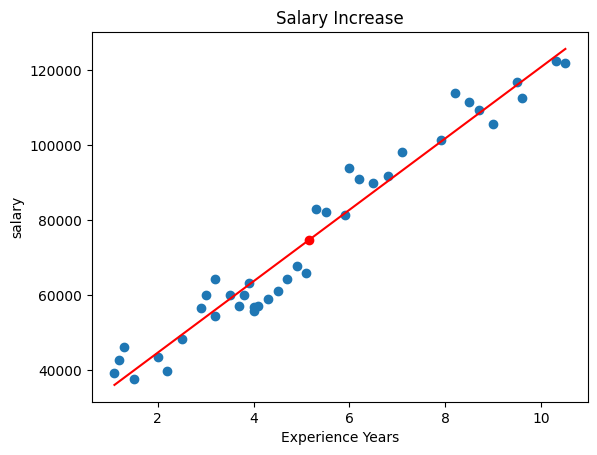

In [16]:
## best fit line 
plt.plot(x,reg.predict(x),color='red')
plt.scatter(x.mean(),y.mean(),color='red')
#matplotlib
plt.scatter(df['Experience Years'],df['Salary'])
plt.xlabel('Experience Years')
plt.ylabel('salary')
plt.title('Salary Increase')

# Cost & Lose

In [17]:
df.head()

,Experience Years,Salary,pre_salary
0,1.1,39343,36149.031319
1,1.2,42774,37101.396369
2,1.3,46205,38053.761420
3,1.5,37731,39958.491522
4,2.0,43525,44720.316775


In [18]:
df['lose']=df['Salary']-df['pre_salary']
df[['lose']].head()

,lose
0,3193.968681
1,5672.603631
2,8151.238580
3,-2227.491522
4,-1195.316775


In [19]:
df.head()

,Experience Years,Salary,pre_salary,lose
0,1.1,39343,36149.031319,3193.968681
1,1.2,42774,37101.396369,5672.603631
2,1.3,46205,38053.761420,8151.238580
3,1.5,37731,39958.491522,-2227.491522
4,2.0,43525,44720.316775,-1195.316775


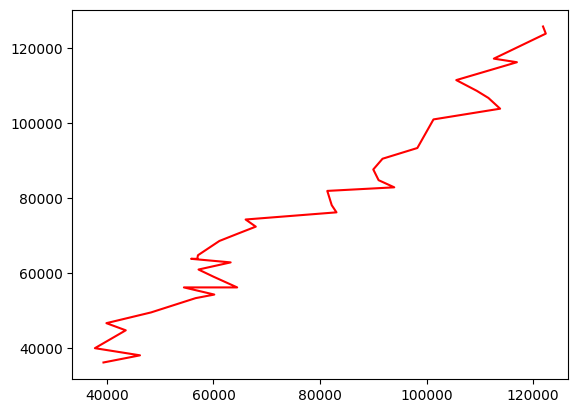

In [21]:
plt.plot(df['Salary'],df['pre_salary'],color='red')




In [23]:
## cost
#MSE and mae
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [24]:
df

,Experience Years,Salary,pre_salary,lose
0,1.1,39343,36149.031319,3193.968681
1,1.2,42774,37101.396369,5672.603631
2,1.3,46205,38053.761420,8151.238580
3,1.5,37731,39958.491522,-2227.491522
4,2.0,43525,44720.316775,-1195.316775
5,2.2,39891,46625.046877,-6734.046877
6,2.5,48266,49482.142029,-1216.142029
7,2.9,56642,53291.602232,3350.397768
8,3.0,60150,54243.967283,5906.032717
9,3.2,54445,56148.697384,-1703.697384


In [26]:
mse = mean_squared_error(df['Salary'], df['pre_salary'])
mse

28960383.65377621

In [27]:
mae = mean_absolute_error(df['Salary'], df['pre_salary'])
mae

4516.281792544623